## homework1

In [3]:
from sklearn.datasets import load_boston

In [4]:
data = load_boston()

In [5]:
X,y = data['data'],data['target']

In [8]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [20]:
from matplotlib import pyplot as plt
import random

In [16]:
def draw_crim_and_price():
    plt.scatter(X[:,0], y)

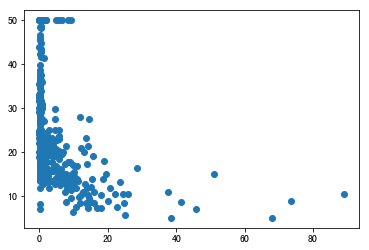

In [17]:
draw_crim_and_price()

In [18]:
def draw_rm_and_price():
    plt.scatter(X[:, 5], y)

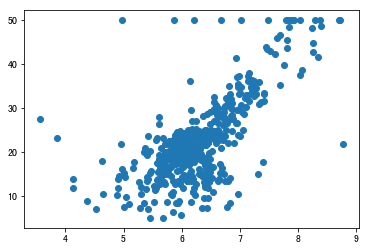

In [19]:
draw_rm_and_price()

In [21]:
def price(rm, k,b):
    return k*rm+b

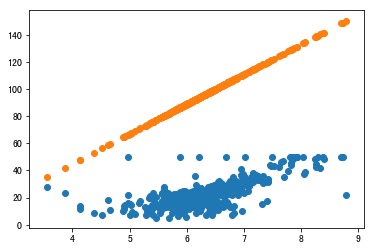

In [30]:
X_rm=X[:,5]
k = random.randint(-100,100)
b = random.randint(-100,100)
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]
draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

### homework2-Search Problem

In [31]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [1]:
from lxml import etree
import requests

In [10]:
base_url = 'http://bj.bendibao.com/ditie/linemap.shtml'

response = requests.get(base_url)
html_tree = etree.HTML(response.text)
subway_objs = html_tree.xpath('//div[@class="line-list"]')
subway_items={}
station_dict = {}
for subway_obj in subway_objs:
    # 地铁线路
    subway_line = subway_obj.xpath('.//strong/a')[0].text
    subway_stations = subway_obj.xpath('.//div[@class="station"]/a/text()')
    subway_items.update({subway_line:subway_stations})
print(subway_items)

for subway_line,subway_stations in subway_items.items():
    stations = []
    last_station = None
    for station in subway_stations:
        # if station not in station_dict.keys() and last_station != None:
        if station not in station_dict.keys():
            station_dict.setdefault(station,[])
            if last_station:
                station_dict.get(last_station).append(station)
                station_dict.get(station).append(last_station)
        else:
            station_dict.get(last_station).append(station)
            station_dict.get(station).append(last_station)
        last_station = station
print(station_dict)

{'北京地铁1号线(M1)线路图': ['苹果园', '古城', '八角游乐园', '八宝山', '玉泉路', '五棵松', '万寿路', '公主坟', '军事博物馆', '木樨地', '南礼士路', '复兴门', '西单', '天安门西', '天安门东', '王府井', '东单', '建国门', '永安里', '国贸', '大望路', '四惠', '四惠东'], '北京地铁2号线(内环)线路图': ['积水潭', '鼓楼大街', '安定门', '雍和宫', '东直门', '东四十条', '朝阳门', '建国门', '北京站', '崇文门', '前门', '和平门', '宣武门', '长椿街', '复兴门', '阜成门', '车公庄', '西直门'], '北京地铁2号线(外环)线路图': ['西直门', '车公庄', '阜成门', '复兴门', '长椿街', '宣武门', '和平门', '前门', '崇文门', '北京站', '建国门', '朝阳门', '东四十条', '东直门', '雍和宫', '安定门', '鼓楼大街', '积水潭'], '北京地铁4号线(M4)线路图': ['安河桥北', '北宫门', '西苑', '圆明园', '北京大学东门', '中关村', '海淀黄庄', '人民大学', '魏公村', '国家图书馆', '动物园', '西直门', '新街口', '平安里', '西四', '灵境胡同', '西单', '宣武门', '菜市口', '陶然亭', '北京南站', '马家堡', '角门西', '公益西桥', '新宫', '西红门', '高米店北', '高米店南', '枣园', '清源路', '黄村西大街', '黄村火车站', '义和庄', '生物医药基地', '天宫院'], '北京地铁5号线(M5)线路图': ['宋家庄', '刘家窑', '蒲黄榆', '天坛东门', '磁器口', '崇文门', '东单', '灯市口', '东四', '张自忠路', '北新桥', '雍和宫', '和平里北街', '和平西桥', '惠新西街南口', '惠新西街北口', '大屯路东', '北苑路北', '立水桥南', '立水桥', '天通苑南', '天通苑', '天通苑北'], '北京地铁6号线线路图': ['海淀五路居', '慈寿寺', '花园桥', '白石桥南', '

AttributeError: 'NoneType' object has no attribute 'append'

In [9]:
station_dict.get('西直门')

['车公庄', '西直门', '西直门', '车公庄', '动物园', '新街口', '火器营', '大钟寺']